In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.nn_dueling import DuelingNet

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [2]:
norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
target_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=25,
    train_freq=3,
    batch_size=100,
    w_sync_freq=10,
    memory_size=1000,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.01,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.001),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn.run(500)

collecting experience...
0..
Ep: 25 | L: 2176.013 | R: -14.7 | R.Avg.R: -14.94 | P: 3.38 | R.Avg P: 2.45 | NW: 100281.70238000038 | R.Avg NW: 99379.18 | R.N_Units: 218
Ep: 50 | L: 2036.376 | R: -16.08 | R.Avg.R: -14.76 | P: 3.84 | R.Avg P: 1.84 | NW: 100720.86029000007 | R.Avg NW: 98780.86 | R.N_Units: 218
Ep: 75 | L: 2081.887 | R: -14.23 | R.Avg.R: -15.14 | P: -1.08 | R.Avg P: 2.31 | NW: 95954.33247000031 | R.Avg NW: 99244.13 | R.N_Units: 218
Ep: 100 | L: 1997.295 | R: -13.7 | R.Avg.R: -14.8 | P: 5.26 | R.Avg P: 4.34 | NW: 102103.02286999974 | R.Avg NW: 101209.73 | R.N_Units: 223
Ep: 125 | L: 2094.831 | R: -14.62 | R.Avg.R: -15.16 | P: 2.62 | R.Avg P: 2.95 | NW: 99544.91373000033 | R.Avg NW: 99858.18 | R.N_Units: 219
Ep: 150 | L: 2136.867 | R: -14.5 | R.Avg.R: -14.91 | P: 4.9 | R.Avg P: 4.06 | NW: 101755.7974299999 | R.Avg NW: 100938.16 | R.N_Units: 222
Ep: 175 | L: 2059.132 | R: -15.66 | R.Avg.R: -14.94 | P: -0.11 | R.Avg P: 3.47 | NW: 96889.61196000017 | R.Avg NW: 100361.46 | R.N_Un

## Visualizations

### Traning

Text(0.5, 1.0, 'Rolling avg balance per episode')

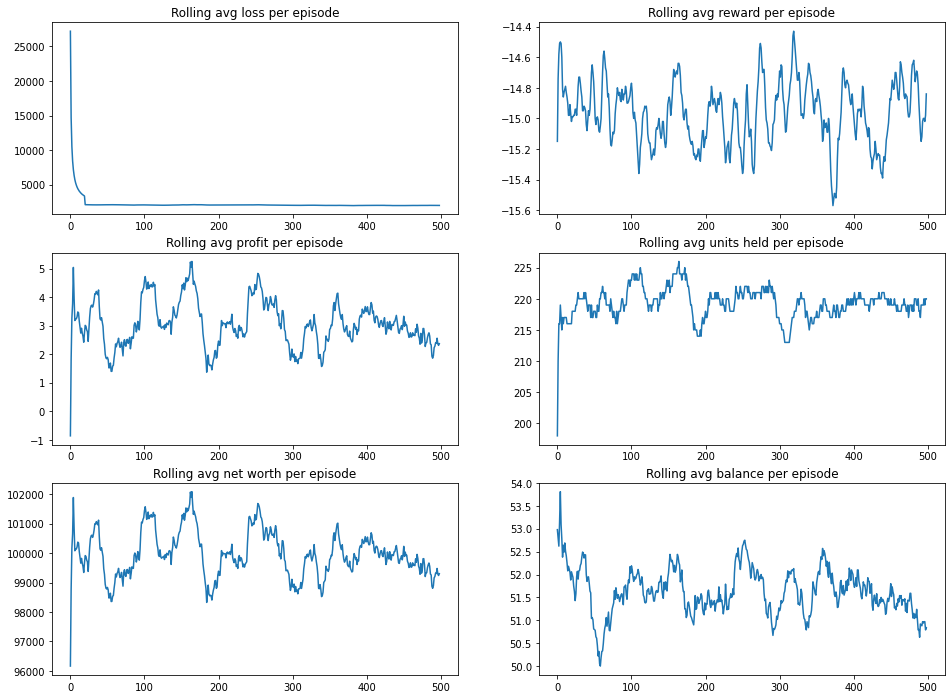

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')